In [3]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt		   ratings_small.txt
 매수종목2.txt		   ratings_test.txt
 adult.data		   ratings_train.txt
 auto-mpg.csv		   sample1.pdf
 bmi_500.csv		   sample2.pdf
 citibike.csv		   sample_merge.pdf
 매수종목.csv		   sample.xlsx
 data_mine.csv		   score.csv
 data_population.csv	   sonar.csv
 data_studentlist_en.csv   stock-data.csv
 demo.docx		  'stock price.xlsx'
 diabetes.csv		  'stock valuation.xlsx'
 example.docx		   temp-20210628T020850Z-001.zip
 height_weight.txt	   test.db.db
 HelloWorld.xlsx	   test.txt
 house_price.csv	   ThoraricSurgery.csv
 lenna.png		   titanic.xls
 little-char.png	   tmdb_5000_credits.csv
 ml_class.png		   tmdb_5000_movies.csv
 pca_1.png		   Traffic_Accident_2017.csv
 pca_2.png		   train.csv
 pca_3.png		   user_id_mean.csv
 Picture1.png		   wine.csv
 population_number.csv	   주가데이터.xlsx
 ram_price.csv		   남북한발전전력량.xlsx


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # 평가를 위한 모듈

df = pd.read_csv(drive_path + 'bmi_500.csv', index_col='Label')
df.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [6]:
df.loc['Normal']

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [7]:
df.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

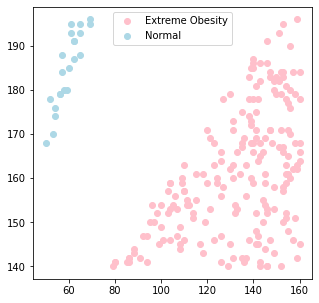

In [8]:
plt.figure(figsize=(5,5))

t = df.loc['Extreme Obesity']
plt.scatter(t['Weight'], t['Height'], color = 'pink', label='Extreme Obesity')

t = df.loc['Weak']
plt.scatter(t['Weight'], t['Height'], color='lightblue', label='Normal')


plt.legend()
plt.show()

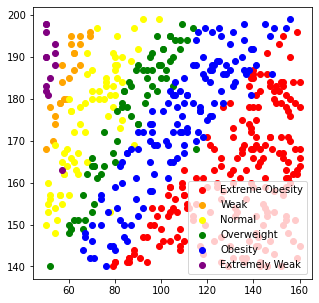

In [9]:
#함수화로 편하게 작업할 때

def easy_scatter(label, color):
  t = df.loc[label]
  plt.scatter(t['Weight'], t['Height'], color=color, label=label)

plt.figure( figsize=(5, 5) )

easy_scatter('Extreme Obesity', 'red')
easy_scatter('Weak', 'orange')
easy_scatter('Normal', 'yellow')
easy_scatter('Overweight', 'green')
easy_scatter('Obesity', 'blue')
easy_scatter('Extremely Weak', 'purple')

plt.legend()
plt.show() #지저분한 것이 사라짐

In [34]:
data = pd.read_csv(drive_path + 'bmi_500.csv')

X = data.loc[:, 'Height':'Weight']
y = data.loc[:, 'Label']

print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [35]:
X_train = X.iloc[:350, :]
X_test = X.iloc[350:, :]

y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [56]:
bmi_model = KNeighborsClassifier(n_neighbors=15)#파라매터를 어떻게 조절하냐에 따라 값들이 달라짐
bmi_model.fit(X_train, y_train)
pre = bmi_model.predict(X_test)
metrics.accuracy_score(y_test, pre)  #매소드 인 듯

0.8866666666666667

In [59]:
bmi_model.predict([[152,58], [100,20]])

array(['Normal', 'Normal'], dtype=object)